# Model Building Part Uno  

## 1. PREPARATION

### 1a. Import import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 300)

%matplotlib inline
sns.set()

### 1b. Define useful functions

In [32]:
def plot_feature_importance(importance, names):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    x = fi_df['feature_importance']
    y = fi_df['feature_names']
    
    return x, y

### 1c. Read .csv dataset file

In [33]:
df_base = pd.read_csv("listings_cleaned_clf.csv")
df_base.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

df_base.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,has_cancelled,extra_cost_security,extra_cost_cleaning,mrt_dist,interchange,identity_manual,kba,phone,sesame_offline,google,selfie,government_id,facebook,zhima_selfie,manual_online,manual_offline,work_email,email,offline_government_id,reviews,jumio,weibo,sesame,verify_count,Bathtub,Gym,Dog(s),Airconditioning,EVcharger,Safetycard,Laptopfriendlyworkspace,Well-litpathtoentrance,Coffeemaker,Washer,Bedlinens,Highchair,TV,Other,Babymonitor,Essentials,Keypad,Hottub,Privatelivingroom,Changingtable,Kitchen,Wifi,Elevator,Outletcovers,Beachfront,Wideentryway,Iron,Petsliveonthisproperty,Cookingbasics,Smartlock,Singlelevelhome,Wheelchairaccessible,Babybath,Wideclearancetoshower,Beachessentials,toilet,Crib,Buzzer/wirelessintercom,Luggagedropoffallowed,Showergel,Extraspacearoundbed,Step-freeshower,Petsallowed,Groundflooraccess,Tablecornerguards,Electricprofilingbed,Privateentrance,Hotwater,Pocketwifi,Oven,Flatpathtoguestentrance,Smokedetector,Breadmaker,Handheldshowerhead,Otherpet(s),Dishesandsilverware,Microwave,Windowguards,Dishwasher,Lockonbedroomdoor,Stove,Indoorfireplace,Paidparkingoffpremises,Freeparkingonpremises,Fixedgrabbarsfortoilet,Kitchenette,Paidparkingonpremises,Lakeaccess,Disabledparkingspot,Stairgates,Hangers,Firstaidkit,Ethernetconnection,Breakfast,PacknPlay_travelcrib,Bathtubwithbathchair,Fireplaceguards,Firmmattress,Waterfront,Gameconsole,Poolwithpoolhoist,Family/kidfriendly,Showerchair,Widedoorwaytoguestbathroom,Accessible-heightbed,Hostgreetsyou,Suitableforevents,Childrensbooksandtoys,Hotwaterkettle,Shampoo,Pool,Wideentranceforguests,Fullkitchen,CableTV,Babysitterrecommendations,Buildingstaff,Cat(s),Smokingallowed,Trashcan,Gardenorbackyard,Dryer,Nostairsorstepstoenter,Freestreetparking,Fixedgrabbarsforshower,Lockbox,Airpurifier,Room-darkeningshades,Cleaningbeforecheckout,Heating,Carbonmonoxidedetector,Extrapillowsandblankets,Wideentrance,Hairdryer,Accessible-heighttoilet,Mobilehoist,Longtermstaysallowed,Privatebathroom,Selfcheck-in,BBQgrill,Fireextinguisher,Widehallways,Patioorbalcony,Doorman,Childrensdinnerware,Internet,Refrigerator,24-hourcheck-in,amenity_count
0,1297.0,3,93.048033,0.0,1.0,1.0,0.0,Western Water Catchment,West Region,1,House,Entire home/apt,6,1.0,1.0,1.0,Real Bed,60.0,0.0,0.0,1,0.0,180,1125,29,59,89,364,0,1,flexible,0,0,1,1,0,0,1,0,0,63.204,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,477.0,3,93.048033,0.0,1.0,1.0,0.0,Lim Chu Kang,North Region,1,Farm stay,Shared room,4,1.0,1.0,4.0,Real Bed,65.0,138.0,0.0,1,40.0,2,500,30,60,90,365,0,0,flexible,0,0,1,0,0,1,0,1,0,1080.743,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13
2,337.0,3,100.000000,0.0,52.0,1.0,0.0,Orchard,Central Region,0,Serviced apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,541.0,0.0,68.0,2,135.0,3,1125,29,59,89,364,0,0,strict_14_with_grace_period,0,0

### 1d. One-Hot Encoding for categorical variables

In [34]:
df_to_train = pd.get_dummies(data=df_base, columns=['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                                                    'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

# Split dataset into predictors(X) and response(y)
y = df_to_train["number_of_reviews"]
X = df_to_train.drop(["number_of_reviews"], axis=1)

In [35]:
df_to_train.sample(10)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,has_cancelled,extra_cost_security,extra_cost_cleaning,mrt_dist,interchange,identity_manual,kba,phone,sesame_offline,google,selfie,government_id,facebook,zhima_selfie,manual_online,manual_offline,work_email,email,offline_government_id,reviews,jumio,weibo,sesame,verify_count,Bathtub,Gym,Dog(s),Airconditioning,EVcharger,Safetycard,Laptopfriendlyworkspace,Well-litpathtoentrance,Coffeemaker,Washer,Bedlinens,Highchair,TV,Other,Babymonitor,Essentials,Keypad,Hottub,Privatelivingroom,Changingtable,Kitchen,Wifi,Elevator,Outletcovers,Beachfront,Wideentryway,Iron,Petsliveonthisproperty,Cookingbasics,Smartlock,Singlelevelhome,Wheelchairaccessible,Babybath,Wideclearancetoshower,Beachessentials,toilet,Crib,Buzzer/wirelessintercom,Luggagedropoffallowed,Showergel,Extraspacearoundbed,Step-freeshower,Petsallowed,Groundflooraccess,Tablecornerguards,Electricprofilingbed,Privateentrance,Hotwater,Pocketwifi,Oven,Flatpathtoguestentrance,Smokedetector,Breadmaker,Handheldshowerhead,Otherpet(s),Dishesandsilverware,Microwave,Windowguards,Dishwasher,Lockonbedroomdoor,Stove,Indoorfireplace,Paidparkingoffpremises,Freeparkingonpremises,Fixedgrabbarsfortoilet,Kitchenette,Paidparkingonpremises,Lakeaccess,Disabledparkingspot,Stairgates,Hangers,Firstaidkit,Ethernetconnection,Breakfast,PacknPlay_travelcrib,Bathtubwithbathchair,Fireplaceguards,Firmmattress,Waterfront,Gameconsole,Poolwithpoolhoist,Family/kidfriendly,Showerchair,Widedoorwaytoguestbathroom,Accessible-heightbed,Hostgreetsyou,Suitableforevents,Childrensbooksandtoys,Hotwaterkettle,Shampoo,Pool,Wideentranceforguests,Fullkitchen,CableTV,Babysitterrecommendations,Buildingstaff,Cat(s),Smokingallowed,Trashcan,Gardenorbackyard,Dryer,Nostairsorstepstoenter,Freestreetparking,Fixedgrabbarsforshower,Lockbox,Airpurifier,Room-darkeningshades,Cleaningbeforecheckout,Heating,Carbonmonoxidedetector,Extrapillowsandblankets,Wideentrance,Hairdryer,Accessible-heighttoilet,Mobilehoist,Longtermstaysallowed,Privatebathroom,Selfcheck-in,BBQgrill,Fireextinguisher,Widehallways,Patioorbalcony,Doorman,Childrensdinnerware,Internet,Refrigerator,24-hourcheck-in,amenity_count,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Paya Lebar,neighbourhood_cleansed_Pioneer,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,nei

For this dataset, we will only use models like Decision Trees and Random Forest for two reasons:

1) Linear models like LinearRegression **do not** work well with data that is not normalised.  
2) There isn't a need to work with extrapolated data.  
3) The fitted model does not need to have high interpretability.  

In [36]:
from sklearn.model_selection import cross_val_score

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [37]:
df_base[df_base["number_of_reviews"] == 0]["availability_365"].describe()

count    2907.000000
mean      221.072239
std       153.453519
min         0.000000
25%         8.500000
50%       309.000000
75%       361.000000
max       365.000000
Name: availability_365, dtype: float64

In [38]:
df_base[df_base["number_of_reviews"] != 0]["availability_365"].describe()

count    4825.000000
mean      196.559585
std       145.805316
min         0.000000
25%        48.000000
50%       227.000000
75%       346.000000
max       365.000000
Name: availability_365, dtype: float64

## 2. PRELIMINARY MODEL SELECTION

### 2a. 10-fold cross validation

Pick a model that has good accuracy, without (too much) overfitting.

In [55]:
clf = []

clf.append([DecisionTreeClassifier(random_state=420), "DecTree"])
clf.append([RandomForestClassifier(random_state=420), "RForest"])
clf.append([ExtraTreesClassifier(random_state=420), "ExTrees"])
clf.append([AdaBoostClassifier(random_state=420), "AdaBoost"])
clf.append([GradientBoostingClassifier(random_state=420), "GBoost"])
clf.append([XGBClassifier(verbosity=0, random_state=420), "XGBoost"])
clf.append([LGBMClassifier(random_state=420), "LGBMClf"])

In [8]:
for model, name in clf:
    
    # Default cv value uses StratifiedKFold
    scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    
    print("{}: \t{}".format(name, round(scores.mean(), 5)))

DecTree: 	0.65634
RForest: 	0.71738
ExTrees: 	0.70031
AdaBoost: 	0.73098
GBoost: 	0.74313
XGBoost: 	0.71674
LGBMClf: 	0.72851


The top three models are:
1. AdaBoost  
2. GradientBoost 
3. LightGBM  

The models will now be trained and tested using the **entire** dataset. Note that there may be slight overfitting. From the accuracy scores, we determine the selection of the final model that we will further fine-tune and extract feature importances from at the end of the process.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 2b. Training/Fitting : Adaptive Boosting Classifier

AdaBoost = 0.7868217054263565


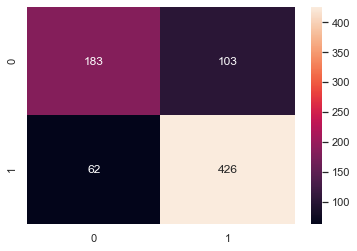

In [57]:
from sklearn.metrics import confusion_matrix

AdaBoost = AdaBoostClassifier(random_state=420)
AdaBoost.fit(X_train, y_train)
print("AdaBoost = {}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('adaboost1.svg', format='svg', dpi=1200)

### 2c. Training/Fitting : Gradient Boosting Classifier

GBoost = 0.8074935400516796


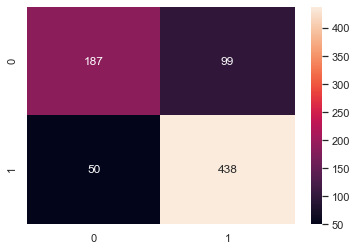

In [58]:
GBoost = GradientBoostingClassifier(random_state=420)
GBoost.fit(X_train, y_train)
print("GBoost = {}".format(GBoost.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

y_pred = GBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('gboost1.svg', format='svg', dpi=1200)

### 2d. Training/Fitting : LightGBM Classifier

LightGBM = 0.8320413436692506


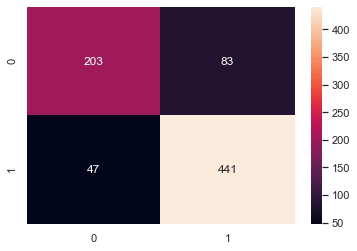

In [59]:
LGB = LGBMClassifier(random_state=420)
LGB.fit(X_train, y_train)
print("LightGBM = {}".format(LGB.score(X_test, y_test)))

y_pred = LGB.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('lightgbm1.svg', format='svg', dpi=1200)

We have a winner! LGBMClassifier has the highest accuracy score out of the three models that were selected.

Let's plot **ALL** the feature importances from the trained LGBMClassifier model to find out how we can improve it.

## 3. MODEL TUNING 

### 3a. Plot feature importances

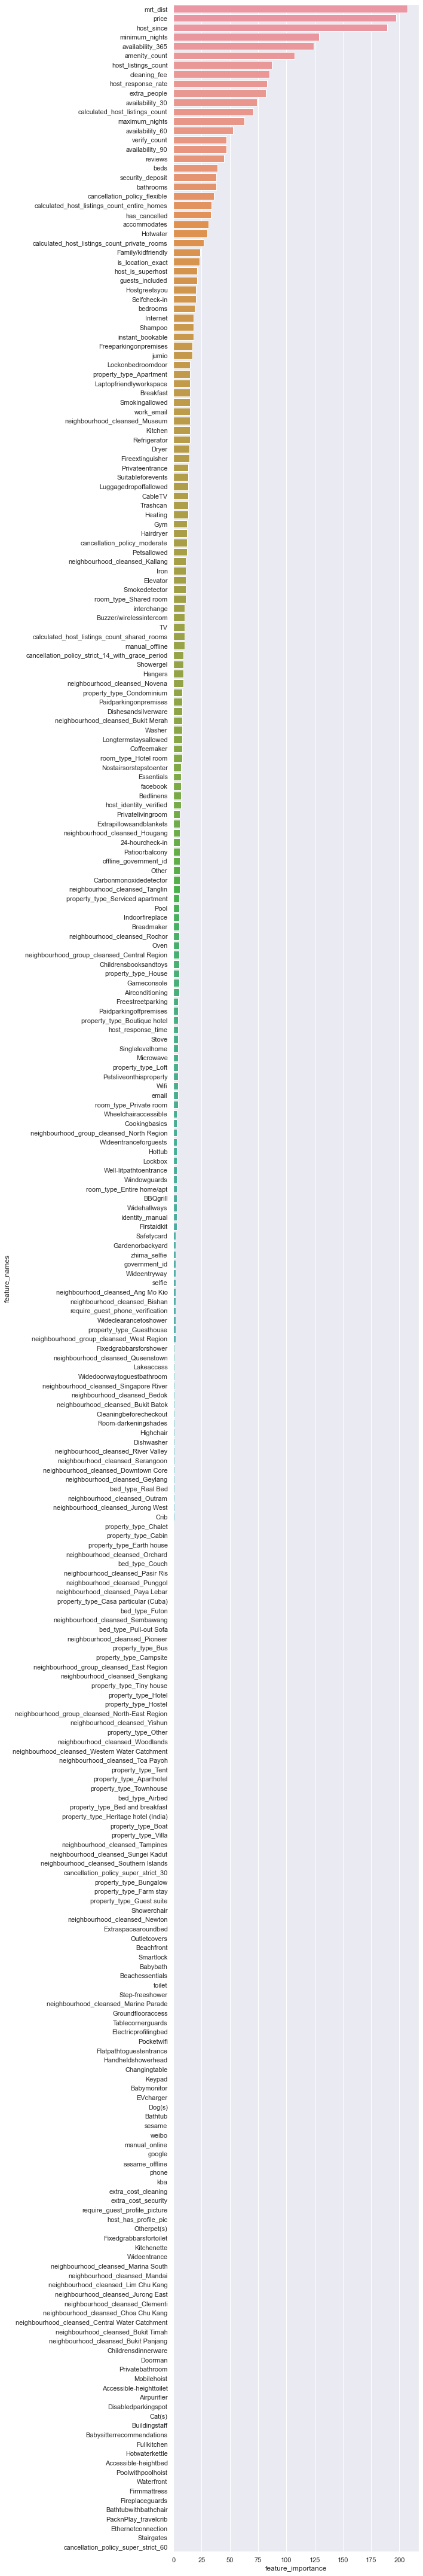

In [60]:
X_graph, y_graph = plot_feature_importance(LGB.feature_importances_, X_train.columns)

f = plt.figure(figsize=(10, 60))
image = sns.barplot(X_graph, y_graph);
plt.tight_layout()

image.figure.savefig('importances1.svg', format='svg', dpi=1600)

### 3b. Modification #1: Drop not-so-useful features

First observation - an overwhelming majority of "neighbourhood_cleansed_xxx" columns have little to no effect on the model's decision making process. By encoding the column, it only massively increases the dimensionality of the dataset. The same is true for "bed_type".

We will drop the entire columns and retrain the model again.

In [61]:
df_base.drop(['neighbourhood_cleansed', 'bed_type'], axis=1, inplace=True)

### 3d. Modification #2: Category binning for categorical features

"property_type" seems to have a mixture of both important and not important categories. We will group all the less common categories together with "other".

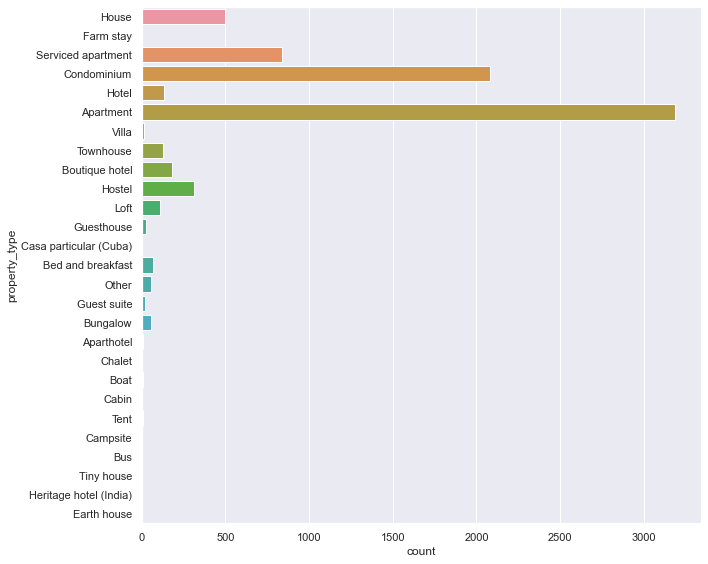

In [62]:
f = plt.figure(figsize=(10,8))

sns.countplot(data=df_base, y="property_type");
plt.tight_layout()

In [63]:
mapper = {"Farm stay":"Other", "Casa particular (Cuba)":"Other", "Aparthotel":"Other", "Chalet":"Other", 
          "Boat":"Other", "Cabin":"Other", "Tent":"Other", "Campsite":"Other", "Bus":"Other", 
          "Tiny house":"Other", "Heritage hotel (India)":"Other", "Earth house":"Other", "Villa":"Other", 
          "Guest suite":"Other", "Guesthouse":"Other", "Bungalow":"Other"}

df_base.replace(mapper, inplace=True)

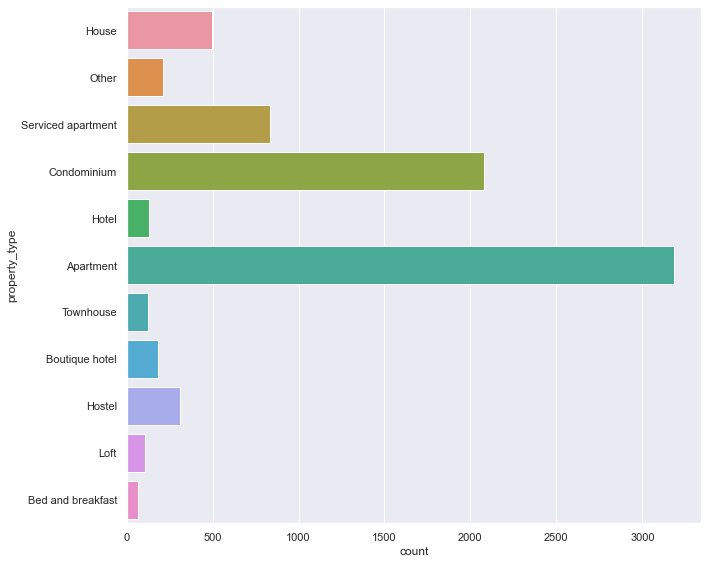

In [64]:
f = plt.figure(figsize=(10,8))

sns.countplot(data=df_base, y="property_type");
plt.tight_layout()

## 4. RESULT COMPARISON

### 4a. Rebuild data

In [65]:
df_to_train = pd.get_dummies(data=df_base, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 
                                                    'cancellation_policy'])

# Split dataset into predictors(X) and response(y)
y = df_to_train["number_of_reviews"]
X = df_to_train.drop(["number_of_reviews"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

### 4b. Re-training Adaptive Boosting Classifier

AdaBoost = 0.7751937984496124


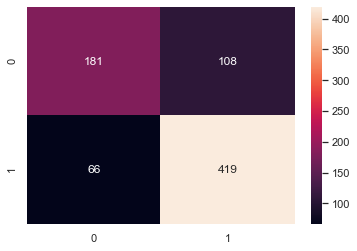

In [66]:
AdaBoost = AdaBoostClassifier(random_state=420)
AdaBoost.fit(X_train, y_train)
print("AdaBoost = {}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('adaboost2.svg', format='svg', dpi=1200)

### 4c. Re-training Gradient Boosting Classifier

GBoost = 0.8087855297157622


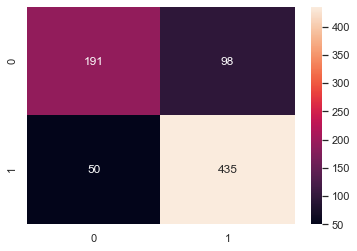

In [67]:
GBoost = GradientBoostingClassifier(random_state=420)
GBoost.fit(X_train, y_train)
print("GBoost = {}".format(GBoost.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

y_pred = GBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('gboost2.svg', format='svg', dpi=1200)

### 4d. Re-training LGBMClassifier

Score = 0.8229974160206718


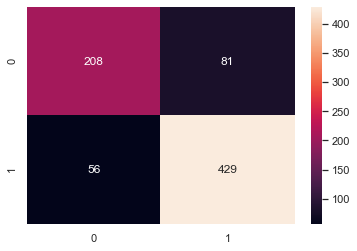

In [68]:
LGB = LGBMClassifier(random_state=420)
LGB.fit(X_train, y_train)
print("Score = {}".format(LGB.score(X_test, y_test)))

y_pred = LGB.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('lightgbm2.svg', format='svg', dpi=1200)

# Model Building Part Dos : El Experimento

Let us perform a little experiment! We introduce a similar cleaned dataset, but now without having the amenities split into a massive number of categories.

## 1. PREPARATION

### 1a. Read .csv dataset 

In [86]:
df_noamenities = pd.read_csv("listings_cleaned_clf_no_amenities.csv")

df_noamenities.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

### 1b. Perform same feature modifications

In [87]:
# One Hot Encoding
df_to_train = pd.get_dummies(data=df_noamenities, columns=['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                                                           'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

# Split dataset into predictors(X) and response(y)
y = df_to_train["number_of_reviews"]
X = df_to_train.drop(["number_of_reviews"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

## 2. MODEL FITTING AND RESULT COMPARISON

### 2a. Training/Fitting Adaptive Boosting Classifier

AdaBoost = 0.772609819121447


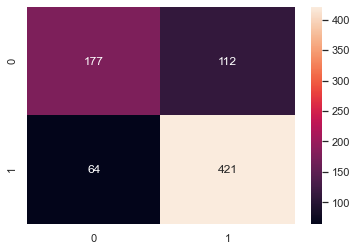

In [88]:
AdaBoost = AdaBoostClassifier(random_state=420)
AdaBoost.fit(X_train, y_train)
print("AdaBoost = {}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('adaboost3.svg', format='svg', dpi=1200)

### 2b. Training/Fitting : Gradient Boosting Classifier

GBoost = 0.7906976744186046


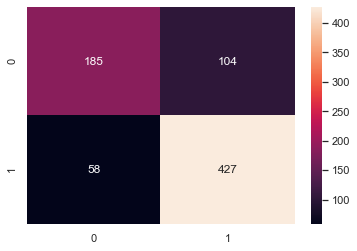

In [89]:
GBoost = GradientBoostingClassifier(random_state=420)
GBoost.fit(X_train, y_train)
print("GBoost = {}".format(GBoost.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

y_pred = GBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('gboost3.svg', format='svg', dpi=1200)

### 2c. Training/Fitting : LightGBM Classifier

LightGBM = 0.8191214470284238


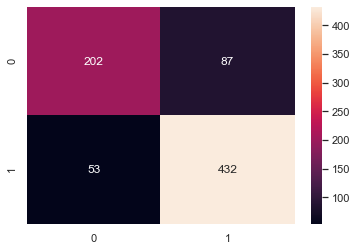

In [90]:
LGB = LGBMClassifier(random_state=420)
LGB.fit(X_train, y_train)
print("LightGBM = {}".format(LGB.score(X_test, y_test)))

y_pred = LGB.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('lightgbm3.svg', format='svg', dpi=1200)

# Model Building Part Tres: NLP

## 1. PREPARATION

In [91]:
df_base_nlp = pd.read_csv("listings_cleaned_clf.csv", index_col="id")
df_base_nlp.drop(["Unnamed: 0"], axis=1, inplace=True)

df_nlp_title = pd.read_csv("title.csv", index_col="id")
df_nlp_title.drop(["Unnamed: 0"], axis=1, inplace=True)

df_nlp_desc = pd.read_csv("desc.csv", index_col="id")
df_nlp_desc.drop(["Unnamed: 0"], axis=1, inplace=True)

df_base_nlp = pd.concat([df_base_nlp, df_nlp_title, df_nlp_desc], axis=1)

In [92]:
# Display missing values
def missing_values(df):
    
    size = len(df)
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/size*100).sort_values(ascending=False)

    missing_data = pd.concat([total, round(percent, 3)], axis=1, keys=['Total', 'Percent'])
    
    return missing_data

In [93]:
missing_values(df_base_nlp).head(5)

,Total,Percent
desc_predictions,2936,36.996
title_predictions,2936,36.996
host_response_time,204,2.571
verify_count,204,2.571
Coffeemaker,204,2.571


In [94]:
df_base_nlp.dropna(inplace=True)

In [95]:
# One Hot Encoding
df_to_train = pd.get_dummies(data=df_base_nlp, columns=['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                                                           'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

# Split dataset into predictors(X) and response(y)
y = df_to_train["number_of_reviews"]
X = df_to_train.drop(["number_of_reviews"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

## 2. MODEL BUILDING

AdaBoost = 0.8282828282828283


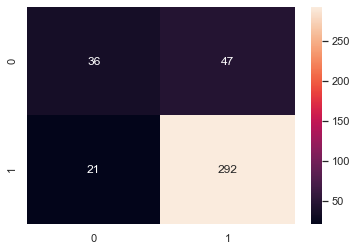

In [79]:
AdaBoost = AdaBoostClassifier(random_state=420)
AdaBoost.fit(X_train, y_train)
print("AdaBoost = {}".format(AdaBoost.score(X_test, y_test)))

y_pred = AdaBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('adaboost4.svg', format='svg', dpi=1200)

GBoost = 0.8661616161616161


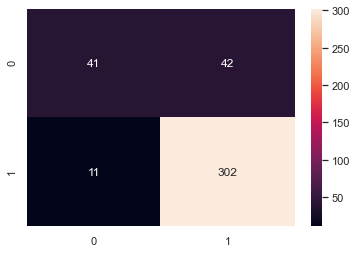

In [80]:
GBoost = GradientBoostingClassifier(random_state=420)
GBoost.fit(X_train, y_train)
print("GBoost = {}".format(GBoost.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

y_pred = GBoost.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('gboost4.svg', format='svg', dpi=1200)

LightGBM = 0.8712121212121212


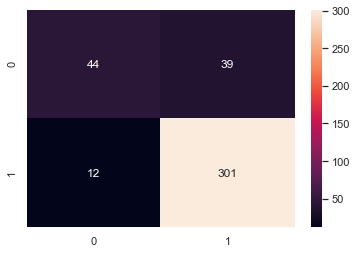

In [96]:
LGB = LGBMClassifier(random_state=420)
LGB.fit(X_train, y_train)
print("LightGBM = {}".format(LGB.score(X_test, y_test)))

y_pred = LGB.predict(X_test)

# row->actual | col->pred
image = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f");

image.figure.savefig('lightgbm4.svg', format='svg', dpi=1200)

## 3. EXTRACT FEATURE IMPORTANCES

### 3a. Feature Importances: LightGBM Classifier

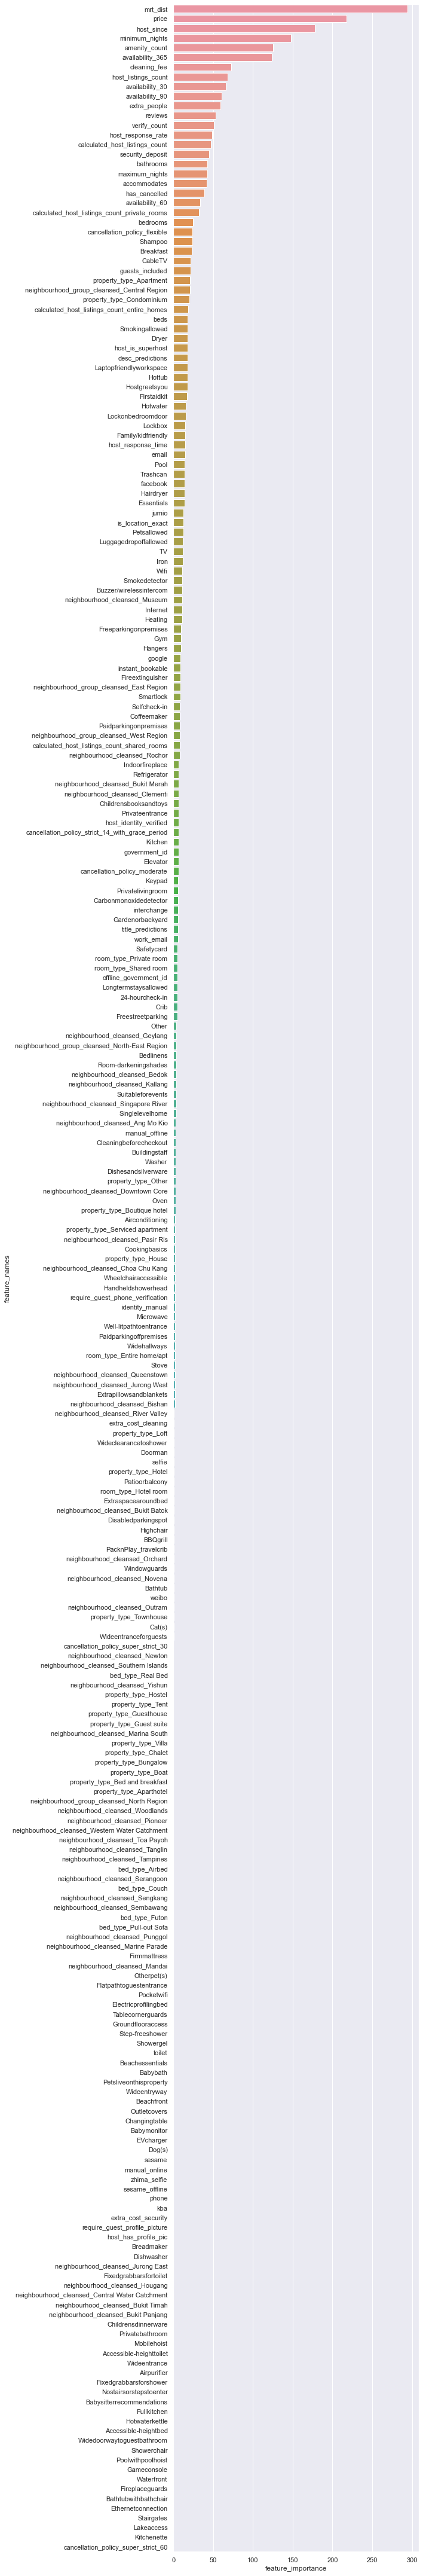

In [100]:
X_graph, y_graph = plot_feature_importance(LGB.feature_importances_, X_train.columns)

f = plt.figure(figsize=(10, 60))
image = sns.barplot(X_graph, y_graph);

plt.tight_layout()